In [11]:
import sys
sys.path.append('../functions/')
from bike_rentals import BikeRentals

In [12]:
# Create an instance of BikeRentals()
data = BikeRentals()
data

In [13]:
# Use the download_url() method to download the zip file

data.download_url()

In [14]:
# Use the unzip() method to unzip the file

data.unzip()

In [15]:
# Showcase the dataframe for a simple quick overview of the data

df = data.data_df
df 

instant      dteday  season  yr  mnth  hr  holiday  \
2011-01-01 00:00:00        1  2011-01-01       1   0     1   0        0   
2011-01-01 01:00:00        2  2011-01-01       1   0     1   1        0   
2011-01-01 02:00:00        3  2011-01-01       1   0     1   2        0   
2011-01-01 03:00:00        4  2011-01-01       1   0     1   3        0   
2011-01-01 04:00:00        5  2011-01-01       1   0     1   4        0   
...                      ...         ...     ...  ..   ...  ..      ...   
2012-12-31 19:00:00    17375  2012-12-31       1   1    12  19        0   
2012-12-31 20:00:00    17376  2012-12-31       1   1    12  20        0   
2012-12-31 21:00:00    17377  2012-12-31       1   1    12  21        0   
2012-12-31 22:00:00    17378  2012-12-31       1   1    12  22        0   
2012-12-31 23:00:00    17379  2012-12-31       1   1    12  23        0   

                     weekday  workingday  weathersit  temp   atemp   hum  \
2011-01-01 00:00:00        5           0           1  0.24  0.2879  0.81   
2011-01-01 01:00:00        5           0           1  0.22  0.2727  0.80   
2011-01-01 02:00:00        5           0           1  0.22  0.2727  0.80   
2011-01-01 03:00:00        5           0           1  0.24  0.2879  0.75   
2011-01-01 04:00:00        5           0           1  0.24  0.2879  0.75   
...                      ...         ...         ...   ...     ...   ...   
2012-12-31 19:00:00        0           1           2  0.26  0.2576  0.60   
2012-12-31 20:00:00        0           1           2  0.26  0.2576  0.60   
2012-12-31 21:00:00        0           1           1  0.26  0.2576  0.60   
2012-12-31 22:00:00        0           1           1  0.26  0.2727  0.56   
2012-12-31 23:00:00        0           1           1  0.26  0.2727  0.65   

                     windspeed  casual  registered  cnt  
2011-01-01 00:00:00     0.0000       3          13   16  
2011-01-01 01:00:00     0.0000       8          32   40  
2011-01-01 02:00:00     0.0000       5          27   32  
2011-01-01 03:00:00     0.0000       3          10   13  
2011-01-01 04:00:00     0.0000       0           1    1  
...                        ...     ...         ...  ...  
2012-12-31 19:00:00     0.1642      11         108  119  
2012-12-31 20:00:00     0.1642       8          81   89  
2012-12-31 21:00:00     0.1642       7          83   90  
2012-12-31 22:00:00     0.1343      13          48   61  
2012-12-31 23:00:00     0.1343      12          37   49  

[17379 rows x 17 columns]

# DATAFRAME INSIGHTS

* The weekday column was previously wrongly assigned to the American weekday format. The method unzip() already makes the changes to European datetime format to the weekday column.

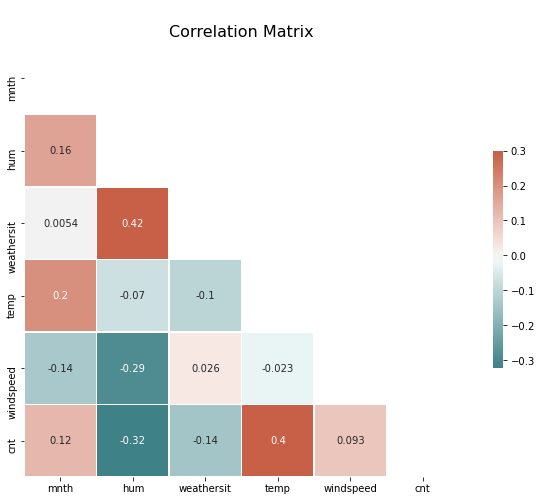

In [16]:
data.correlation_matrix()

# CORRELATION MATRIX INSIGHTS

* Temperature is what affects the most the number of bike rentals. Higher temperatures are therefore more correlated to renting of bikes.

        "Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
        precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors."
        

    
* Months also positively affects how many rentals happen. It makes sense because months are also positively correlated to temperature.

* Higher Weather Situations probably mean Rain, Ice, Snow,... while lower values mean sunny and no clouds, so that's one possibility to why there exists a relatively high negative correlation between the weather situation and bike rentals.

* Humidity is the one variable that affects the number of rentals negatively the most: higher humidity means the consumer less propensity to rent a bike.

* Windspeed doesn't seem to have a big effect.

Choose the week you want to see the data for: 42


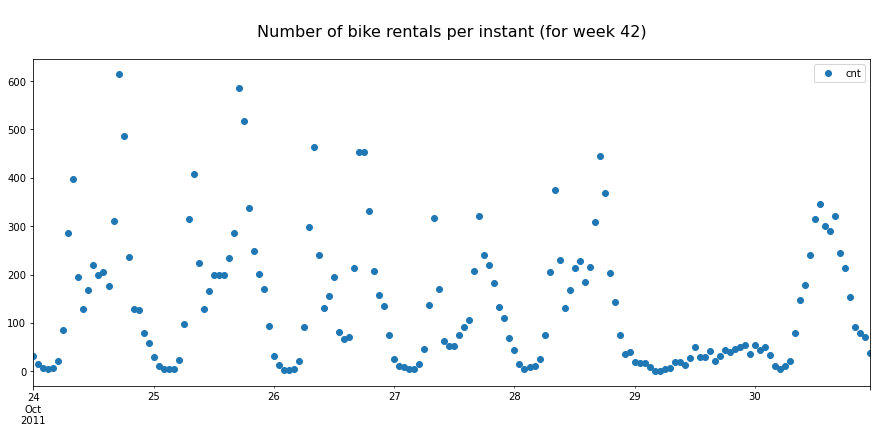

In [17]:
# We observe the number of records per week at week 0, 4, 96 and 105 which were the weeks that had less rentals and compare their behaviour with a normal week (50, 60 and 70, for example).

# Call the method regression on the data to compare some of the weeks in our dataset.

data.weekly_plot()

# INSIGHTS OF PLOTTING THE WEEKLY DATA

* By looking at the plot, most weeks follow the same pattern for most workdays: a peak early in the day and then another peak closer to the end of the afternoon. This pattern in bike rentals might be a good indicator that people that use this service, use it for their daily work commutes. 

* Regarding Saturdays and Sundays, the beahviour is slightly different, once there is usually one peak in early afternoon. 

* Although this is not the best plot to analyse different weeks, once one cannot see several weeks simultaneously, basically all weeks had the behaviour described. The user can select weeks 36 or 50, where the patterns described are specially clear.

#### - Managing outliers:

Reading the data documentation and plotting the frequency distribution of the number of records per week allowed us to arrive to the following conclusions regarding the data of some weeks:

* Week 0 and 105 are outliers because they don't have data from the whole week. For that reason, they were removed.

* Making a quick search on Google, if we look for 2012-10-30 in Washington D.C. (one of the days in Week 96), from where the data is, one can see that the city was affected by Hurricane Sandy that week. Therefore, because it was a natural disaster, the group thought it would be best to consider it an outlier.

* Week 4 also had a rather strange behaviour, having almost a day completely without instances. However, another google search of the date and area reveals that at that time Washington was suffering a big snowstorm. Nonethless, the data should be accounted for in the opinion of the group because snow is in fact a factor that can influence a consumer propensity to use a bike. 

![image info](../images/Graph_weeks.jpeg)

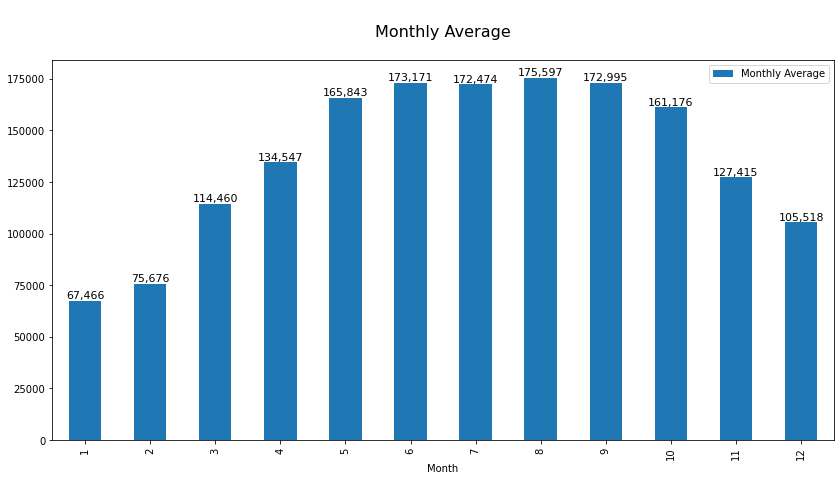

In [18]:
data.avg_rent_month()

# Looking at the average of the monthly rentals by month

* The month where the average of bike rentals for the 2 years was higher was August, followed closely by June, July and September, while the number of rentals was the lowest in January (over a 100,000 difference from January to August)

* This corroborates the insights given by the correlation matrix, in which the temperature and humidity levels were found to be strongly correlated with the number of bike rentals. Here too, the months in which temperature tends to be higher, are the ones in which a surge in bike rentals was registered.


Choose the month you want to see the data for: august


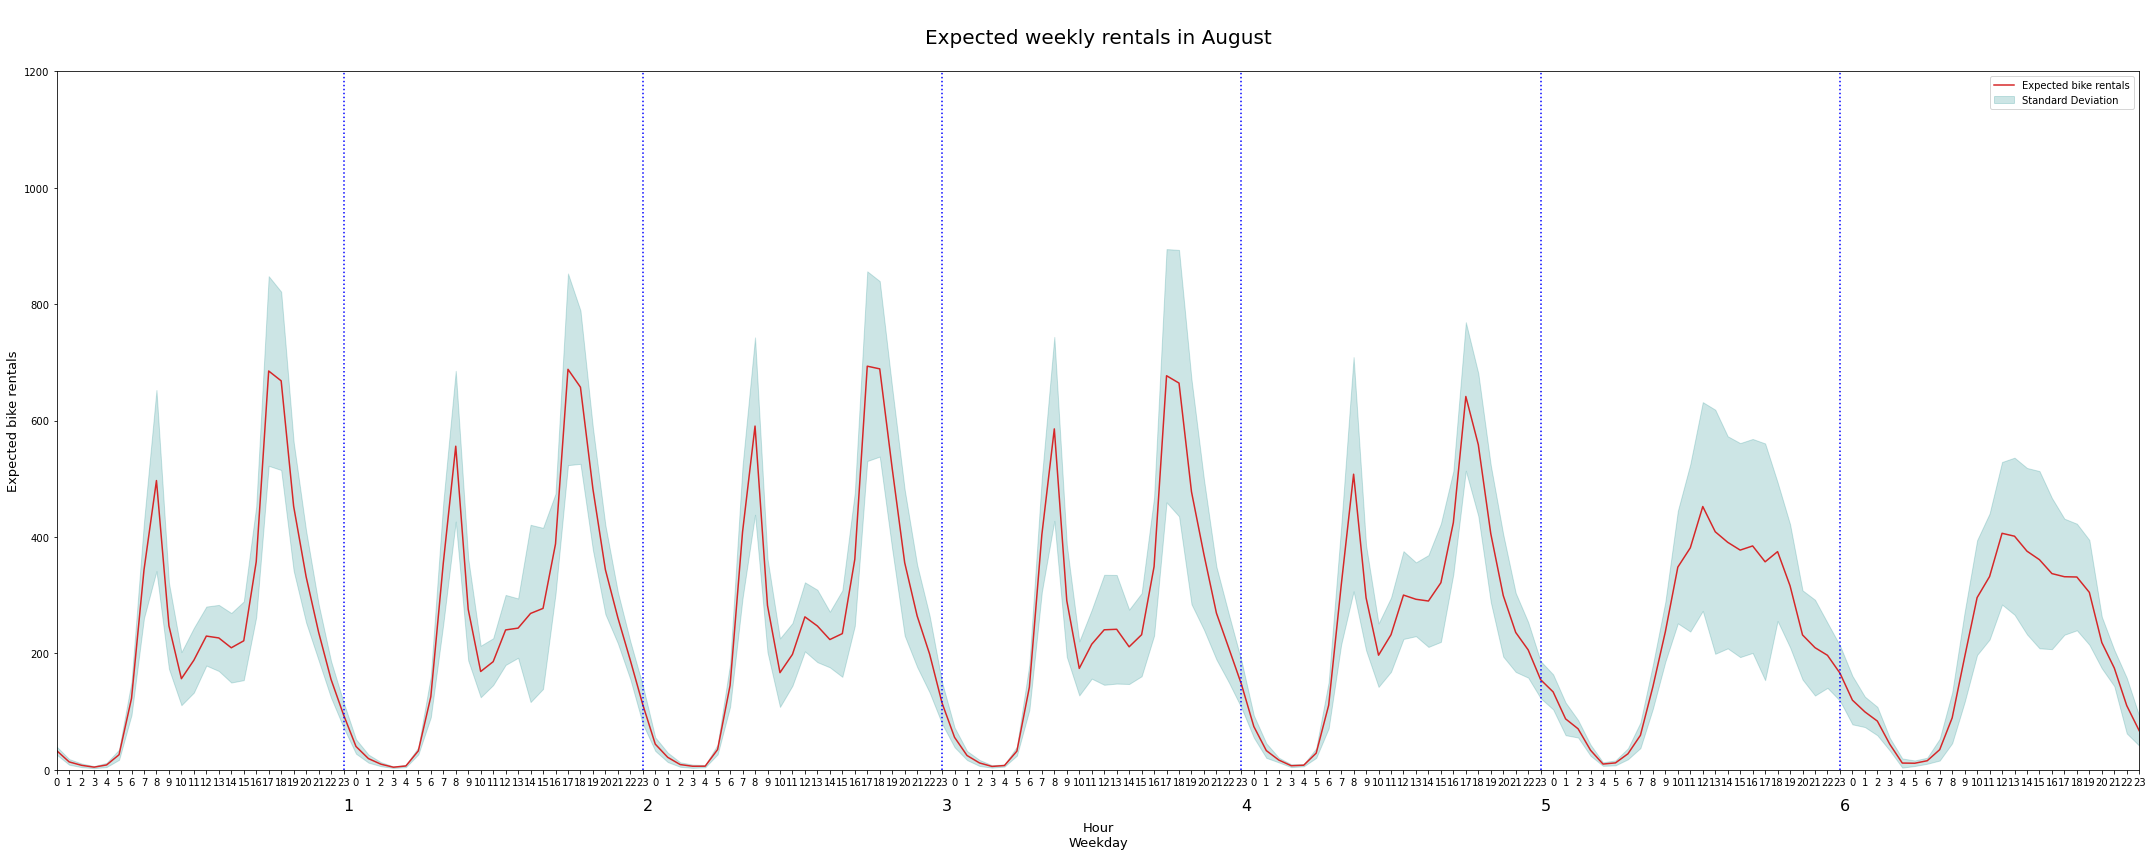

In [20]:
data.forecast()

# Trying to predict the number of rentals in each hour and weekday, given the month

* The above graphic intends to provide an expected number of bike rentals for each hour and weekday, an analysis that, in theory, makes sense once the patterns observed from the previous analysis indicate a possible relation between weekdays and hours - the patterns registered, for example, on a monday don't differ signifficantly from week to week.

* Furthermore, by selecting only the month, a variable important not so much in the pattern of behaviour but more on the number of bike rentals, allows for an educated enough forecast.

* Moreover, this plot allows us to clearly identify the patterns we've discussed before: the two peaks during weekdays and the single one during weekends show the usage of bike rentals follows very different patterns across these two categories, with the weekdays having far taller usage peaks. Inside those categories, however, usage seems to be consistent: usage does not vary widely between weekdays or between weekends.

* Finally, the shaded area of the graph is very important since it shows the standard deviation boundaries for each prediction, working almost as a confidence interval for our prediction. In an informal manner, one can say that for areas where the green shade is abundant, the actual number of bike rentals might deviate more from our forecast in comparison to data points where the shaded area is lower. It is likely that predictions during weekdays is more accurate and precise than weekend predictions, since the shaded areas are smaller, what makes sense since the peaks during weekdays are caused by daily work routines, which are quite homogeneous among users. This is not verified on weekends, since routines in those days vary much more across users once they are not usually driven by rigid schedules.